# Protein similarity check using blastp(uniprot) and pfam

## Load libraries

In [1]:
import pandas as pd
import seaborn as sns

## Load input files

In [47]:
pfam_file = "/vf/users/Phillippy/projects/HG002_Masseq/03.align/squanti/pfam.domtblout"
blastp_file = "/vf/users/Phillippy/projects/HG002_Masseq/03.align/squanti/blastp.outfmt6"
match_file = "/vf/users/Phillippy/projects/HG002_Masseq/03.align/squanti/hg002.integrated.tracking.clean"

In [52]:
m = pd.read_csv(match_file, header = None, sep = '\t')
m.columns = ['trans','type']
m.head(2)

,trans,type
0,TCONS_00000270,nic
1,TCONS_00000271,nic


In [53]:
blastp = pd.read_csv(blastp_file, header = None, sep = '\t')
blastp.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']
blastp = blastp[blastp['sseqid'].str.contains("HUMAN")]
blastp['trans'] = blastp['qseqid'].str.split('.', expand=True)[0]

blastp.head(2)

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,trans
4,TCONS_00025276.p2,sp|O00370|LORF2_HUMAN,80.000,80,16,0,1,80,1196,1275,3.240000e-39,141.0,TCONS_00025276
6,TCONS_00010308.p2,sp|O00370|LORF2_HUMAN,80.233,86,17,0,1,86,1190,1275,2.940000e-42,150.0,TCONS_00010308


In [54]:
blastp_max = blastp.groupby('trans')['pident'].max().reset_index()
blastp_max = pd.merge(m,blastp_max, on='trans')
blastp_max.head(2)

,trans,type,pident
0,TCONS_00000270,nic,100.0
1,TCONS_00000271,nic,100.0


## Plotting!

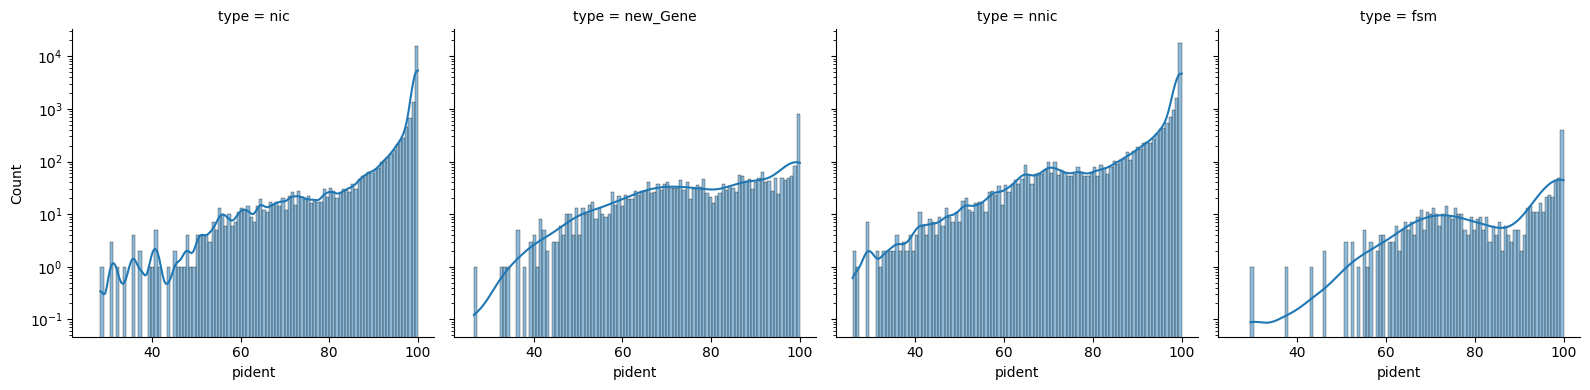

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming blastp_max is already defined as a DataFrame
x = "pident"

# Check if the column exists and convert to float
if x in blastp_max.columns:
    # Convert the column to float, handling errors if necessary
    blastp_max[x] = pd.to_numeric(blastp_max[x], errors='coerce')  # Use 'coerce' to handle non-numeric values

    # Drop NaN values after conversion
    blastp_max = blastp_max.dropna(subset=[x])

    # Create a FacetGrid to plot histograms by 'type' with shared y-axis
    g = sns.FacetGrid(blastp_max, col='type', col_wrap=4, height=4, sharey=True)  # sharey=True ensures shared y-axis
    num_bins = 100  # Set the number of bins

    g.map(sns.histplot, x, bins=num_bins, kde=True)

    # Set y-axis to logarithmic scale for each facet
    for ax in g.axes.flatten():
        ax.set_yscale('log', base = 10)  # Set y-axis to logarithmic scale
        ax.set_xlabel(x)
        # ax.set_title(f'Distribution of {x} by Type')

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{x}' does not exist in the DataFrame.")
